# Regresión Lineal

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## 1. Carga de datos limpios

In [10]:
df = pd.read_csv('mexico_wbes_clean.csv')
print(f'Empresas cargadas: {len(df)}')
df.head()

Empresas cargadas: 1275


,sales,employees,age,training,exporter,financing,competition,labor_cost,labor_prod,successful
0,30700000,53,3.0,0.0,0,0.0,0,320000.0,5.792453e+05,0
1,29000000,22,1.0,0.0,1,0.0,0,33500.0,1.318182e+06,0
2,43000000,107,12.0,0.0,0,0.0,1,120000.0,4.018692e+05,0
3,135000000,270,25.0,0.0,0,0.0,0,711000.0,5.000000e+05,1
4,6000000,15,5.0,0.0,1,0.0,1,8000.0,4.000000e+05,0


## 2. Definición de variables

**Pregunta:** ¿Qué variables explican mejor las ventas de una empresa?

- **Variable dependiente (Y):** `(sales)`
- **Variables independientes (X):** `employees`, `age`, `training`, `exporter`, `financing`, `competition`.

In [11]:
FEATURES = ['employees', 'age', 'training', 'exporter', 'financing', 'competition']
TARGET   = 'sales'

X = df[FEATURES].values
y = np.log10(df[TARGET])

print('Variables independientes:', FEATURES)
print(f'Variable dependiente: ({TARGET})')
print(f'\nRango de y: [{y.min():.2f}, {y.max():.2f}]')

Variables independientes: ['employees', 'age', 'training', 'exporter', 'financing', 'competition']
Variable dependiente: (sales)

Rango de y: [5.58, 9.15]


## 3. División y escalado

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

scaler  = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

print(f'Entrenamiento: {len(X_train)} muestras')
print(f'Prueba:        {len(X_test)} muestras')

Entrenamiento: 1020 muestras
Prueba:        255 muestras


## 4. Entrenamiento del modelo

In [13]:
model = LinearRegression()
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

r2   = r2_score(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('=== Métricas del modelo ===')
print(f'  R²   = {r2:.4f}  →  el modelo explica el {r2*100:.1f}% de la varianza en ventas')
print(f'  MSE  = {mse:.4f}  ')
print(f'  RMSE = {rmse:.4f} ')

=== Métricas del modelo ===
  R²   = 0.6815  →  el modelo explica el 68.1% de la varianza en ventas
  MSE  = 0.1343  
  RMSE = 0.3664 


## 5. Coeficientes

In [14]:
coef_df = pd.DataFrame({
    'Variable'   : FEATURES,
    'Coeficiente': model.coef_
}).sort_values('Coeficiente', ascending=False)

print(f'Intercepto: {model.intercept_:.4f}\n')
print(coef_df.to_string(index=False))

Intercepto: 7.5001

   Variable  Coeficiente
  employees     0.395931
        age     0.072070
  financing     0.042120
competition     0.006132
   training    -0.007609
   exporter    -0.145709


## 6. Gráficas

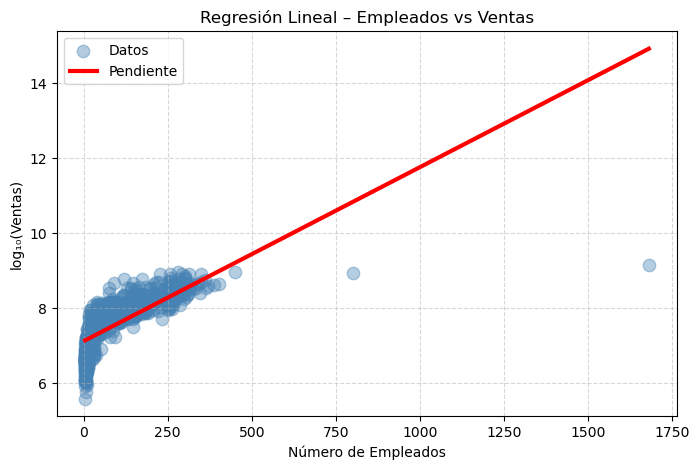

In [15]:
X = df[['employees']].values
y = np.log10(df['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)
y_line  = model.predict(x_range)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='steelblue', s=80, alpha=0.4, label='Datos')
plt.plot(x_range, y_line, color='red', linewidth=3, label='Pendiente')
plt.xlabel('Número de Empleados')
plt.ylabel('log₁₀(Ventas)')
plt.title('Regresión Lineal – Empleados vs Ventas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 7. Interpretación de resultados

**R² = 0.68** — el modelo explica el **68%** de la varianza en ventas con solo 6 variables. Es un ajuste sólido para datos empresariales reales.

**Coeficientes más relevantes (estandarizados):**

| Variable | Coef. | Interpretación |
|---|---|---|
| Empleados | +0.40 | La variable más poderosa: más personal → ventas significativamente mayores |
| Antigüedad | +0.07 | Empresas más maduras tienden a vender más, aunque el efecto es modesto |
| Financiamiento | +0.04 | Acceder a crédito externo impulsa las ventas |
| Exportadora | −0.15 | Muchas exportadoras son medianas empresas con ventas domésticas limitadas |
| Capacitación | −0.01 | Efecto casi nulo en magnitud de ventas (sí importa en éxito, ver modelo logístico) |

**Conclusión:** El tamaño de la empresa (número de empleados) es el predictor dominante de las ventas. El financiamiento y la antigüedad son palancas secundarias positivas.